In [41]:
import numpy as np
import pandas as pd
np.random.seed(44)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="rainbow")
import warnings
warnings.filterwarnings("ignore")

## CL Strategies Plot

In [42]:
tables = pd.read_excel('tables/tables.xlsx', sheet_name=4)
tables

,(Zhang et al. 2020),%,Unnamed: 2,Unnamed: 3,classic,%.1,Unnamed: 6,Unnamed: 7,base,%.2,...,Adaptive CL,%.4,Unnamed: 18,Unnamed: 19,General CL,%.5,Unnamed: 22,Unnamed: 23,UB,Unnamed: 25
0,1443,17.221771,NaN,NaN,1475,19.821284,NaN,NaN,1475,19.821284,...,1387,12.672624,NaN,NaN,1379,12.022746,NaN,NaN,1231,NaN
1,1544,24.115756,NaN,NaN,1401,12.620579,NaN,NaN,1401,12.620579,...,1336,7.395498,NaN,NaN,1325,6.511254,NaN,NaN,1244,NaN
2,1440,18.226601,NaN,NaN,1393,14.367816,NaN,NaN,1393,14.367816,...,1341,10.098522,NaN,NaN,1338,9.852217,NaN,NaN,1218,NaN
3,1637,39.319149,NaN,NaN,1340,14.042553,NaN,NaN,1340,14.042553,...,1305,11.063830,NaN,NaN,1275,8.510638,NaN,NaN,1175,NaN
4,1619,32.271242,NaN,NaN,1390,13.562092,NaN,NaN,1390,13.562092,...,1329,8.578431,NaN,NaN,1303,6.454248,NaN,NaN,1224,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,6135,14.844627,NaN,NaN,6060,13.440659,NaN,NaN,6112,14.414077,...,5714,6.963684,NaN,NaN,5748,7.600150,NaN,NaN,5342,NaN
76,6056,11.405445,NaN,NaN,5935,9.179544,NaN,NaN,5999,10.356880,...,5655,4.028698,NaN,NaN,5588,2.796174,NaN,NaN,5436,NaN
77,6101,13.107156,NaN,NaN,6153,14.071190,NaN,NaN,6294,16.685206,...,5735,6.321839,NaN,NaN,5570,3.262885,NaN,NaN,5394,NaN
78,5943,10.918253,6097.600000,NaN,5945,10.955580,6036.8000,NaN,5995,11.888764,...,5567,3.900709,5682.10000,NaN,5424,1.231803,5578.900000,NaN,5358,NaN


In [43]:
tables_plot = tables[['%.1', '%.2', '%.3', '%.4', '%.5']]
tables_plot.columns = ['ICL', 'Base', 'UCL', 'ASCL', 'ACL']
tables_plot = tables_plot.round(2)

In [44]:
tables_plot_main = pd.DataFrame(columns=['Strategies', 'Sizes', 'Gap'])
sizes = [[15, 15], [20, 15], [20, 20], [30, 15], [30, 20], [50, 15], [50, 20], [100, 20]]
columns = tables_plot.columns
j = 0
for i in range(len(tables_plot)):
    row = tables_plot.iloc[i]
    index = i//10
    size = str(sizes[index][0]) + 'x' + str(sizes[index][1])
    for column in columns:
        value = row[column]
        new_row = [column, size, value]
        tables_plot_main.loc[j] = new_row
        j += 1
        
tables_plot_main

,Strategies,Sizes,Gap
0,ICL,15x15,19.82
1,Base,15x15,19.82
2,UCL,15x15,13.16
3,ASCL,15x15,12.67
4,ACL,15x15,12.02
...,...,...,...
395,ICL,100x20,12.27
396,Base,100x20,13.97
397,UCL,100x20,8.80
398,ASCL,100x20,5.73


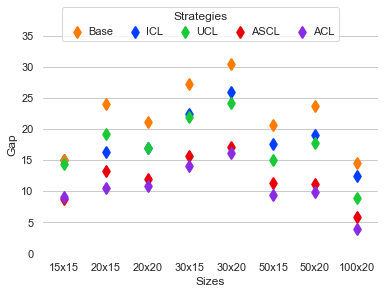

In [45]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(x="Sizes", y="Gap", hue="Strategies",
              data=tables_plot_main, dodge=False, alpha=0.0, zorder=1)

sns.pointplot(x="Sizes", y="Gap", hue="Strategies",
              data=tables_plot_main, dodge=False,
              join=False, palette="bright",
              markers="d", scale=1.1, ci=None)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend([handles[6]] + [handles[5]] + handles[7:], [labels[6]] + [labels[5]] + labels[7:], title="Strategies",
          handletextpad=0, columnspacing=1,
          loc="lower right", bbox_to_anchor=(0.9, 0.95), ncol=5, frameon=True)

plt.ylim(0, 35)
plt.savefig("output_logs/plots/cl_plot.pdf", format="pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')


## Selection Strategies Plot

In [46]:
tables = pd.read_excel('tables/tables.xlsx', sheet_name=1)
tables

,Greedy,%,Unnamed: 2,Unnamed: 3,POMO,%.1,Unnamed: 6,Unnamed: 7,Sampling,%.2,...,Beam,%.3,Unnamed: 14,Unnamed: 15,UB,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1445,17.384240,NaN,NaN,1445,17.384240,NaN,NaN,1379,12.022746,...,1421,15.434606,NaN,NaN,1231,NaN,NaN,NaN,NaN,NaN
1,1405,12.942122,NaN,NaN,1405,12.942122,NaN,NaN,1325,6.511254,...,1390,11.736334,NaN,NaN,1244,NaN,NaN,NaN,NaN,NaN
2,1469,20.607553,NaN,NaN,1344,10.344828,NaN,NaN,1338,9.852217,...,1405,15.353038,NaN,NaN,1218,NaN,NaN,NaN,NaN,NaN
3,1304,10.978723,NaN,NaN,1304,10.978723,NaN,NaN,1275,8.510638,...,1304,10.978723,NaN,NaN,1175,NaN,NaN,NaN,NaN,NaN
4,1345,9.885621,NaN,NaN,1345,9.885621,NaN,NaN,1303,6.454248,...,1326,8.333333,NaN,NaN,1224,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,5859,9.678023,NaN,NaN,5858,9.659304,NaN,NaN,5748,7.600150,...,5935,11.100711,NaN,NaN,5342,NaN,NaN,NaN,NaN,NaN
76,5677,4.433407,NaN,NaN,5657,4.065489,NaN,NaN,5588,2.796174,...,5663,4.175865,NaN,NaN,5436,NaN,NaN,NaN,NaN,NaN
77,5699,5.654431,NaN,NaN,5604,3.893215,NaN,NaN,5570,3.262885,...,5541,2.725250,NaN,NaN,5394,NaN,NaN,NaN,NaN,NaN
78,5548,3.546099,5680.900000,NaN,5484,2.351624,5633.300000,NaN,5424,1.231803,...,5488,2.426278,5637.500000,NaN,5358,NaN,NaN,NaN,NaN,NaN


In [47]:
tables_plot = tables[['%', '%.1', '%.2', '%.3']]
tables_plot.columns = ['Greedy', 'POMO', 'Sampling', 'Beam']
tables_plot = tables_plot.round(2)

In [48]:
tables_plot_main = pd.DataFrame(columns=['Models', 'Sizes', 'Gap'])
sizes = [[15, 15], [20, 15], [20, 20], [30, 15], [30, 20], [50, 15], [50, 20], [100, 20]]
columns = tables_plot.columns
j = 0
for i in range(len(tables_plot)):
    row = tables_plot.iloc[i]
    index = i//10
    size = str(sizes[index][0]) + 'x' + str(sizes[index][1])
    for column in columns:
        value = row[column]
        new_row = [column, size, value]
        tables_plot_main.loc[j] = new_row
        j += 1
        
tables_plot_main

,Models,Sizes,Gap
0,Greedy,15x15,17.38
1,POMO,15x15,17.38
2,Sampling,15x15,12.02
3,Beam,15x15,15.43
4,Greedy,15x15,12.94
...,...,...,...
315,Beam,100x20,2.43
316,Greedy,100x20,3.86
317,POMO,100x20,3.86
318,Sampling,100x20,3.01


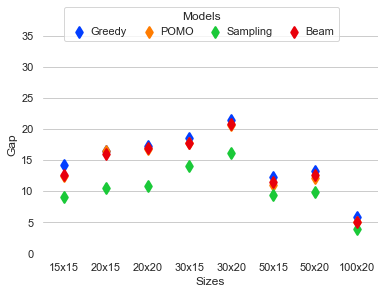

In [49]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(x="Sizes", y="Gap", hue="Models",
              data=tables_plot_main, dodge=False, alpha=0.0, zorder=1)

sns.pointplot(x="Sizes", y="Gap", hue="Models",
              data=tables_plot_main, dodge=False,
              join=False, palette="bright",
              markers="d", scale=1.1, ci=None)
sns.set_style(style='whitegrid') 

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[4:], labels[4:], title="Models",
          handletextpad=0, columnspacing=1,
          loc="lower right", bbox_to_anchor=(0.9, 0.95), ncol=5, frameon=True)

plt.ylim(0, 35)
plt.savefig("output_logs/plots/select_plot.pdf", format="pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')